In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
import glob
import seaborn as sb


columns_to_look = ['EEG.Fp1',	'EEG.AF3',	'EEG.F3',	'EEG.FC1'	,'EEG.C3'	,'EEG.FC3'	,'EEG.T7'	,'EEG.CP5',	'EEG.CP1'	,'EEG.P1'	,'EEG.P7'	,'EEG.P9',	'EEG.PO3'	,'EEG.O1'	,'EEG.O9',	'EEG.POz',	'EEG.Oz',	'EEG.O10',	'EEG.O2',	'EEG.PO4'	,'EEG.P10',	'EEG.P8',	'EEG.P2','EEG.CP2',	'EEG.CP6'	,'EEG.T8',	'EEG.FC4',	'EEG.C4',	'EEG.FC2',	'EEG.F4', 'EEG.AF4',	'EEG.Fp2']


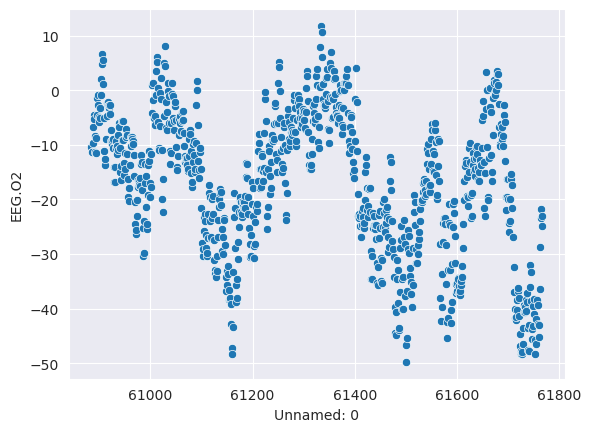

In [20]:


data = pd.read_csv("data/normalized_by_baseline/channels/0_32.csv")
sb.scatterplot(data, x='Unnamed: 0', y='EEG.O2')
plt.show()
print()

In [21]:
import pickle

window_size = 10


X_sequences = []
y_labels = []
for file_path in glob.glob("data/normalized_by_baseline/channels/*.csv"):
    data = pd.read_csv(file_path)
    X = data.drop(columns=['label', 'Unnamed: 0']).values  # Features (32 channels)
    y = data['label'].values  # Labels

    for i in range(len(X) - window_size + 1):
        # Extract sequence of features and label for each window
        X_seq = X[i:i+window_size]
        y_seq = y[i]  # Use label at end of window
        X_sequences.append(X_seq)
        y_labels.append(y_seq)


# Convert sequences to numpy arrays
X_sequences = np.array(X_sequences)
y_labels = np.array(y_labels)
with open("data/forLSTM/X.pck", 'wb') as f:
    # Serialize and write data to file
    pickle.dump(X_sequences, f)
with open("data/forLSTM/Y.pck", 'wb') as f:
    # Serialize and write data to file
    pickle.dump(y_labels, f)
print(np.shape(X_sequences), np.shape(y_labels))
print(y_labels)

(47165, 10, 32) (47165,)
[2 2 2 ... 0 0 0]
